Размер данных: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

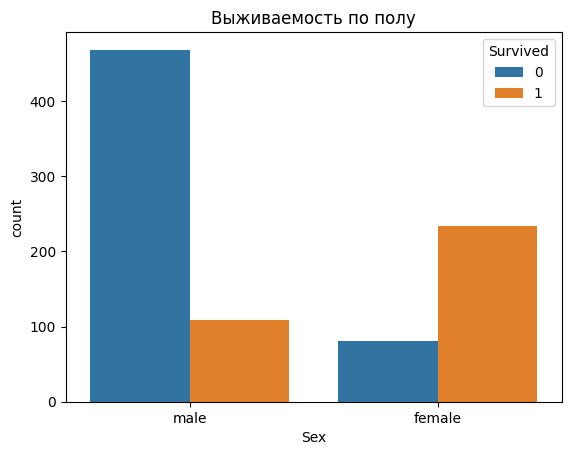

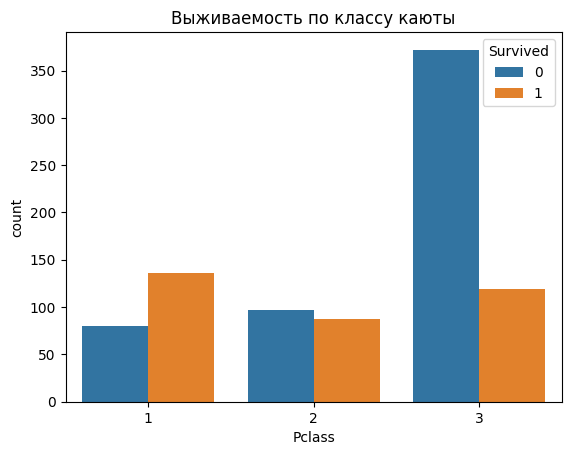

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


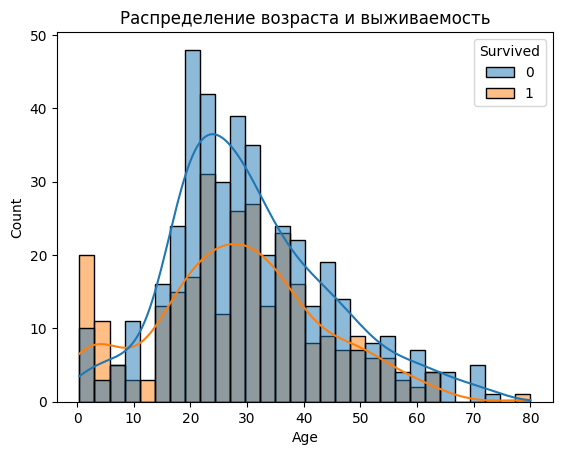

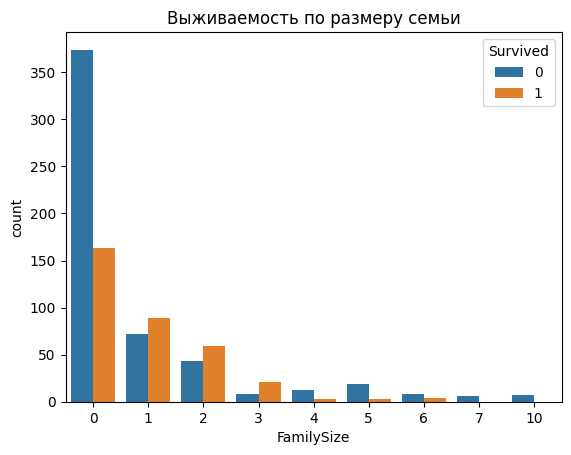

Accuracy модели: 0.7374301675977654


In [2]:
# Titanic Survival Analysis
# -------------------------
# Небольшое исследование данных о пассажирах "Титаника"

# 1. Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Загрузка данных
# На Kaggle Titanic датасет доступен сразу:
data = pd.read_csv("/kaggle/input/titanic/train.csv")

# 3. Первичный обзор
print("Размер данных:", data.shape)
print(data.head())
print(data.info())
print(data.describe())

# 4. Исследовательский анализ (EDA)

## Выживаемость по полу
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Выживаемость по полу")
plt.show()

## Выживаемость по классу каюты
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Выживаемость по классу каюты")
plt.show()

## Распределение возраста
sns.histplot(data=data, x="Age", bins=30, hue="Survived", kde=True)
plt.title("Распределение возраста и выживаемость")
plt.show()

## Выживаемость по числу родственников на борту
data["FamilySize"] = data["SibSp"] + data["Parch"]
sns.countplot(x="FamilySize", hue="Survived", data=data)
plt.title("Выживаемость по размеру семьи")
plt.show()

# 5. Простая модель машинного обучения (логистическая регрессия)

# Для простоты используем только числовые признаки
features = data[["Pclass", "Age", "SibSp", "Parch", "Fare"]].fillna(0)
target = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy модели:", accuracy_score(y_test, preds))

# 6. Итоги (заключение — лучше оформить в markdown-ячейке при заливке)
# - Женщины и дети выживали значительно чаще мужчин.
# - Пассажиры первого класса имели гораздо больше шансов.
# - Простая модель дала точность ~0.75, что уже неплохо для базовой версии.
# - Можно улучшить результат за счет более продвинутой обработки признаков.

